# Lending Club Analysis

## Introduction

This is an initial run through of the Lending Club data

## Contents

- Imports
- Helper Functions
- Data Exploration

## Imports

In [1]:
import os
import ryan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Helper Functions

In [44]:
def countsSummary(pdSeries, columns=['Total Cnt', '% of Total']):
    df = pd.concat([pdSeries.value_counts(), pdSeries.value_counts(normalize=True)], axis=1)
    df.columns = columns
    print(df)

def groupbySummary(pdSeries1, pdSeries2, ignore=None, columns=['Total', '% of Total']):
    s = pdSeries1.groupby(pdSeries2)
    if ignore != None:
        inds = [i for i,val in enumerate(pdSeries1) if val != ignore]
        t = pdSeries1[inds].groupby(pdSeries2)
        df = pd.concat([s.count(), s.mean(), t.count()], axis=1)
        if len(columns) == 2:
            columns.append('Cnt of Total')
    else:
        df = pd.concat([s.count(), s.mean()], axis=1)
    df.columns = columns
    print(df)
    return sns.countplot(pdSeries2, hue=pdSeries1)

def groupbyCutSummary(pdSeries1, pdSeries2, cutLen):
    s = pd.qcut(pdSeries2,cutLen)
    t = pdSeries1.groupby(s)
    print(t.value_counts())
#     print(t.mean())
    plt.figure(figsize=(8,4))
    return sns.countplot(s, hue=pdSeries1)

## Data Exploration

In [2]:
data = pd.read_csv('lending-club-loan-data/loan.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
data.shape

(887379, 74)

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
data.columns.values

array(['acc_now_delinq', 'addr_state', 'all_util', 'annual_inc',
       'annual_inc_joint', 'application_type', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'desc', 'dti',
       'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title',
       'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id',
       'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m',
       'inq_last_6mths', 'installment', 'int_rate', 'issue_d',
       'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d',
       'loan_amnt', 'loan_status', 'max_bal_bc', 'member_id',
       'mths_since_last_delinq', 'mths_since_last_major_derog',
       'mths_since_last_record', 'mths_since_rcnt_il', 'next_pymnt_d',
       'open_acc', 'open_acc_6m', 'open_il_12m', 'open_il_24m',
       'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'out_prncp',
       'out_prncp_inv', 'policy_code', 'pub_rec', 'purpose', 'pymnt_plan',
       'recoveries', 'revol_bal', 'revol_util', 'sub_grade'

In [33]:
countsSummary(data.grade)

   Total Cnt  % of Total
B     254535    0.286839
C     245860    0.277063
A     148202    0.167011
D     139542    0.157252
E      70705    0.079678
F      23046    0.025971
G       5489    0.006186


inq_last_6mths   funded_amnt_inv                                    
(-0.001, 10.62]  Current                                                110051
                 Fully Paid                                              53800
                 Charged Off                                              8082
                 Late (31-120 days)                                       1780
                 Issued                                                   1477
                 In Grace Period                                          1030
                 Does not meet the credit policy. Status:Fully Paid        670
                 Late (16-30 days)                                         406
                 Does not meet the credit policy. Status:Charged Off       237
                 Default                                                   160
(10.62, 15.4]    Current                                                116552
                 Fully Paid                                   

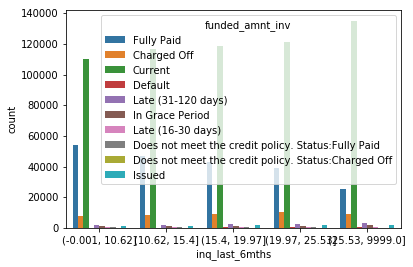

In [46]:
groupbyCutSummary(data.loan_status, data.dti, 5)

In [ ]:
# Verification_Status w/ DTI w/ Income